# Data Undestanding

The data was scrapted from Webseite Stepstone. The dataset consitis of 12 columns. All raws consist text information with two exceptions an id column and time column. The data is saved in json format. As a result the fist step after data loadaing will be transofm json dictionary arrays into dataframe.

In [1]:
import json


In [2]:
import matplotlib.pyplot as plt
#import seaborn as sns
# Assess sentiment classification models 
#from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Importing standard packages. 
import pandas as pd
import numpy as np
import seaborn as sns

# Library re provides regular expressions functionality
import re

# To keep an eye on runtimes
import time

# Saving and loaded objects
import pickle

# langage detection
from langdetect import detect

# Standard NLP workflow
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import sent_tokenize

In [4]:
data = []
with open('../data/jobs.json', encoding='utf-8') as file:
    data = json.load(file)

In [6]:
data[0]['title']

'Haushaltshilfe / Housekeeping (m/w/d) für Concierge-Service in Teilzeit'

In [5]:
df = pd.DataFrame(data) #transforming json dictionary arrays into DataFrame

In [25]:
type(df['time'][0])

str

In [6]:
# Changing object type column to datetime
df['time'] = pd.to_datetime(df.time)

# Creating new column with just the date
df['date'] = df['time'].dt.date

In [29]:
type(df['date'][0])

datetime.date

In [27]:
df.head()

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts,date
0,7216535,2021-06-05 11:21:09,Haushaltshilfe / Housekeeping (m/w/d) für Conc...,ACG Alster Concierge GmbH,Hamburg,Feste Anstellung,Teilzeit,<p>Der moderne Alltag ist ein komplexes Zusamm...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05
1,7216528,2021-06-05 11:21:09,Teamleiter (m/w/d) für unsere Triebfahrzeugfüh...,"Railtrans International, a.s",bundesweit,Feste Anstellung,Vollzeit,<p><strong>Teamleiter (m/w/d) für unsere Trieb...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05
2,7209677,2021-06-05 11:21:09,Sales / Pre-Sales Spezialist (m/w/d) für Studi...,TELTEC AG,München,Feste Anstellung,Vollzeit,<p>Die <strong>Teltec AG</strong> ist seit meh...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05
3,7034977,2021-06-05 11:21:09,IT-Fachkraft / IT-Spezialist als IT-Administra...,Boyens Medienholding GmbH & Co. KG,Heide,Feste Anstellung,Vollzeit,<p><strong>Arbeiten in einem modernen Medienun...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05
4,7238797,2021-06-05 11:21:09,Pflegekraft in der Pflegeeinrichtung auf Pellw...,DRK Kreisverband Nordfriesland e.V.,Husum,Feste Anstellung,"Vollzeit, Teilzeit",<p>Der DRK-Kreisverband Nordfriesland e.V. in ...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05


The next step is examing the data quality and namly the amount of not available data/missing data in the dataset. And to be sure that the scraping was done correctlly I check also if  dunplicates exist based on the unique id.  

In [9]:
#NAs 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
introduction,7567,0.186223
contacts,4438,0.109219
we_offer,3818,0.093961
contract_type,2891,0.071147
work_type,2885,0.071000
profile,1386,0.034109
job_description,1132,0.027858
company,4,0.000098
location,4,0.000098
title,1,0.000025


In [10]:
df[df.duplicated(['id'], keep=False)] #check in if there are any duplicates

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts


As we can see there are no duplicates and generally speaking the amount of missing values is not very big. The largest amount of NAs present in the "introduction" column. As a rule in this section companies describe themselves. In the solumn we_offer companies decribe the benefits that candidat can have if gets this job. I made the decision to fill NAs with empty strings.

In [7]:
#The amount of NAs is very small. Text featurures consist NAs, as a result I ldecided to leav them 
df["introduction"].fillna("", inplace = True)
df["we_offer"].fillna("", inplace = True)
df["contacts"].fillna("", inplace = True)
df["profile"].fillna("", inplace = True)
df["job_description"].fillna("", inplace = True)
df["work_type"].fillna("", inplace = True)
df["company"].fillna("", inplace = True)
df["contract_type"].fillna("", inplace = True)
df["location"].fillna("", inplace = True)
df["title"].fillna("", inplace = True)

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date,0,0.0
contacts,0,0.0
we_offer,0,0.0
profile,0,0.0
job_description,0,0.0
introduction,0,0.0
work_type,0,0.0
contract_type,0,0.0
location,0,0.0
company,0,0.0


Graffic visualisation

Text(0.5, 1.0, 'Location')

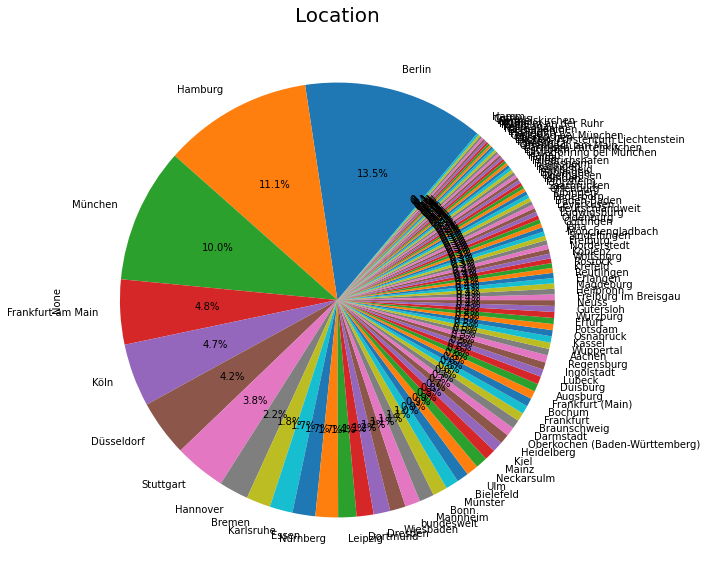

In [18]:
df.location.apply(pd.Series).stack().str.strip().value_counts()[:100].plot.pie(figsize=(12,10), startangle=50, autopct='%1.1f%%', fontsize=10)
plt.title("Location",fontsize=20)

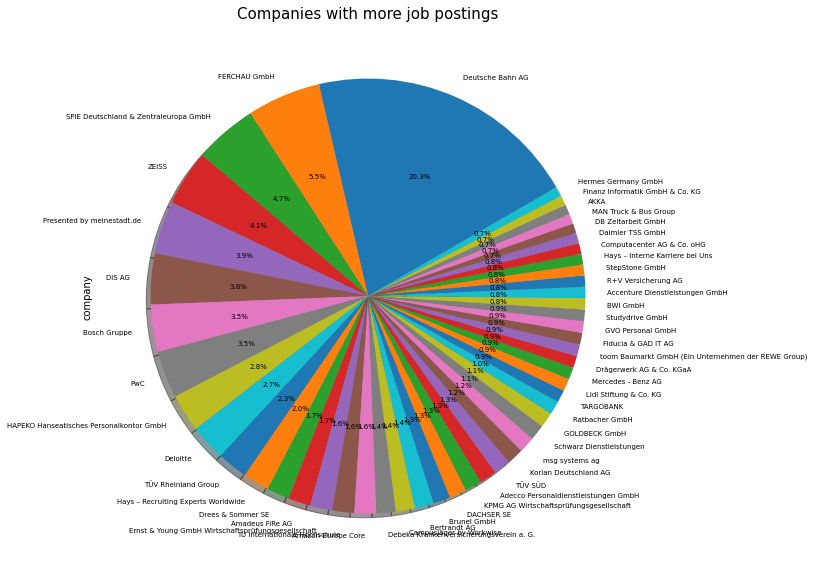

In [16]:
df["company"].value_counts()[:50].plot.pie(figsize=(12,10), shadow=True, startangle=30, autopct='%1.1f%%', fontsize=7)
plt.title("Companies with more job postings", fontsize=15)
plt.show()

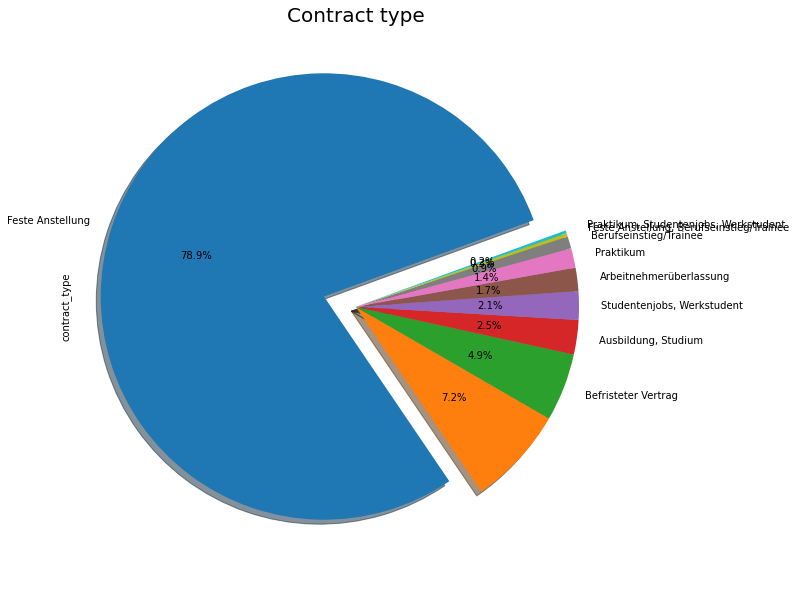

In [77]:
explodeTuple = (0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
df["contract_type"].value_counts()[:10].plot.pie(figsize=(10,15), shadow=True, startangle=20, autopct='%1.1f%%', explode=explodeTuple, fontsize=10)
plt.title("Contract type", fontsize=20)
plt.show()

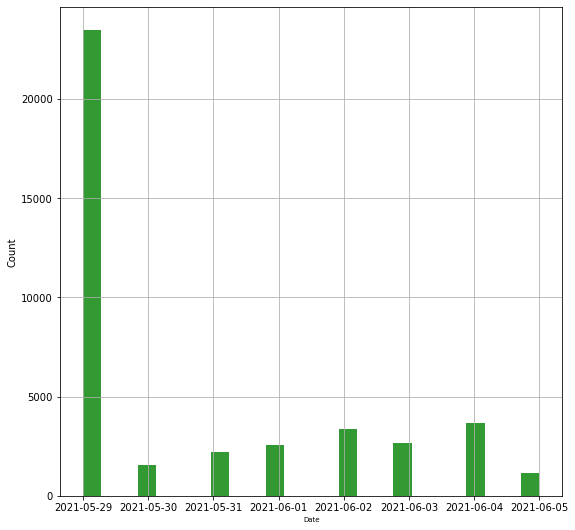

In [76]:
plt.figure(figsize=(9,9))
n, bins, patches = plt.hist(df['date'], 25, facecolor='g', alpha=0.8)
plt.xlabel('Date', size = 7)
plt.ylabel('Count')
#plt.title('XY', size = 7)
plt.xticks(size = 10)
plt.grid(True)
#plt.show()

### Data cleaning

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40634 entries, 0 to 40633
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               40634 non-null  object        
 1   time             40634 non-null  datetime64[ns]
 2   title            40634 non-null  object        
 3   company          40634 non-null  object        
 4   location         40634 non-null  object        
 5   contract_type    40634 non-null  object        
 6   work_type        40634 non-null  object        
 7   introduction     40634 non-null  object        
 8   job_description  40634 non-null  object        
 9   profile          40634 non-null  object        
 10  we_offer         40634 non-null  object        
 11  contacts         40634 non-null  object        
 12  date             40634 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 4.0+ MB


In [79]:
df.introduction.head()

0    <p>Der moderne Alltag ist ein komplexes Zusamm...
1    <p><strong>Teamleiter (m/w/d) für unsere Trieb...
2    <p>Die <strong>Teltec AG</strong> ist seit meh...
3    <p><strong>Arbeiten in einem modernen Medienun...
4    <p>Der DRK-Kreisverband Nordfriesland e.V. in ...
Name: introduction, dtype: object

In [80]:
df.head(2)

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts,date
0,7216535,2021-06-05 11:21:09,Haushaltshilfe / Housekeeping (m/w/d) für Conc...,ACG Alster Concierge GmbH,Hamburg,Feste Anstellung,Teilzeit,<p>Der moderne Alltag ist ein komplexes Zusamm...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05
1,7216528,2021-06-05 11:21:09,Teamleiter (m/w/d) für unsere Triebfahrzeugfüh...,"Railtrans International, a.s",bundesweit,Feste Anstellung,Vollzeit,<p><strong>Teamleiter (m/w/d) für unsere Trieb...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc...",2021-06-05


# Cleaning regex 
I have found out that in column "title" exist a lot of differnt symbols that do not have any symantic or context value. I suppose that they are also present in other text colums. The best way to deal with them is to find and replace, if necessary, or to remove.   

In [9]:
df["title"][428]

'Key Account Manager Immobilienpartner f�r die Region S�d (m/w/d)'

In [192]:
df[df['title'].str.contains('[^a-zA-Z0-9àâéöäüßÖÄÜÀ/ )(*\-–_—‐.:;,®°=•>>\n&€+|*+!#%–§@`³²?¤\" ”\» «\>> <<\xa0\"\´\\u200b\\t\\xad\u2008\ufeff\u202f\u2009/„“\‚‘\[\]]')].title

428      Key Account Manager Immobilienpartner f�r die ...
1772     Assistenz der Geschäftsführung (m/w/d) – Tei...
1943     Referentin bzw. Referent (w/m/d) für Veränder...
2382                      Akquisiteur (m/w/d) Grundstücke
3115     Beschäftigter im Bereich Projektentwicklung /...
4724     Referent (m/w/d) in der Albertinen Diakoniewer...
5578     Bankkaufmann/Baufinanzierungsberater B2C G�ppi...
10871    Heizung, Lüftung, Klima Projektingenieurin / ...
10980    Rechtsanwalt (m/w/d) für gewerblichen Rechtss...
11411    Sachbearbeiter (m/w/d) für die Gebührenüber...
11475    Account Manager für technische Einkäufer / So...
13315    Sachbearbeiterin / Sachbearbeiter (m/w/d) für...
13584           Presales Berater (m·w·d) für Ladestationen
13586       Sales Manager (m·w·d) Vertrieb E-Ladestationen
13588    Partner Manager (m·w·d) für Vertriebspartnersc...
15900    Ausbildung zum Fachinformatiker f�r Anwendungs...
16239    Ausbildung zum Kaufmann f�r Dialogmarketing (m.

In [188]:
re.search('[^a-zA-Z0-9öäüß/ )(*\-–.:,+•\" ”\n&\xa0\'̈]', 'Pﬂegefachkraft für die Phase F (m/w/d)')

<re.Match object; span=(1, 2), match='ﬂ'>

In [203]:
df['title'][2382]

'Akquisiteur (m/w/d) Grundstücke'

In [220]:
df[df['title'].str.contains('\\u2009')].title[2147]

'Entwicklungs-\u2009/\u2009Systemingenieur (m/w/x) im Bereich Regelungstechnik'

'̈ � ﬂ à â é symbols to replace


In [8]:
import re

def clean_text(raw_html):
  clean_ae = re.compile('ä')
  clean_a = re.compile('à|â')  
  clean_e = re.compile('é')
  clean_ue = re.compile('ü|�')
  clean_A = re.compile ('À')
  clean_zeichen = re.compile('[^a-zA-Z0-9öäüß]|xa0|\\u200b|\\t|\\xad|\\\xadd|\\u2008|\\ufeff|\\u202f|\\u2009]') 
  clean_html = re.compile('<.*?>')
  clean_n = re.compile('\\n')
  clean_s = re.compile('\s\s+')
  gn = re.compile('\sgn\s')
  star = re.compile('\*')
  gendering = re.compile('\([mw]?[·|/]?[wm]?[·|/]?([diax*d]|gn)?\)', flags=re.IGNORECASE)#(w|m|d)(m·w·d)(m/w/d) 
  gendering2 = re.compile('\sm\s*w\s*d(iv)?')
  gendering3 = re.compile(' [mdwfwx] [mdwfx] [mdwxf]')
  cleantext = re.sub(clean_ae, 'ä', raw_html)
  cleantext = re.sub(clean_a, 'a', cleantext)
  cleantext = re.sub(clean_e, 'e', cleantext)
  cleantext = re.sub(clean_ue, 'ü', cleantext)
  cleantext = re.sub(clean_A, 'A', cleantext)
  cleantext = re.sub(clean_html, ' ', cleantext)
  cleantext = re.sub(clean_n, ' ', cleantext)
  cleantext = re.sub(gn, ' ', cleantext)
  cleantext = re.sub(star, ' ', cleantext)
  cleantext = re.sub(gendering, ' ', cleantext)
  cleantext = re.sub(clean_zeichen, ' ', cleantext)
  cleantext = re.sub(gendering2, ' ', cleantext)
  cleantext = re.sub(gendering3, ' ', cleantext)
  cleantext = re.sub(clean_s, ' ', cleantext)
    

  return cleantext

In [10]:
clean_text(df['title'][14251])

'HR Business Partner '

In [10]:
clean_text(df['title'][142])

'Sales Sales Manager in für digitales Produkt'

In [15]:
df['title'][27]

'Mitarbeiter m/w/d Vertriebsinnendienst\nFahrzeugtechnik'

In [14]:
clean_text(df['title'][27])

'Mitarbeiter Vertriebsinnendienst Fahrzeugtechnik'

In [28]:
df['title'][1906]

'Ingenieur (m/d/w) der Fachrichtung Versorgungstechnik'

In [13]:
clean_text(df['title'][1906])

'Ingenieur der Fachrichtung Versorgungstechnik'

In [29]:
clean_text(df['title'][7095])

'Financial Accountant '

In [82]:
print(clean_text(df.job_description[1])) #function works

 Wir suchen einen erfahrenen Triebfahrzeugführer, der ca. 50 % seiner Arbeitszeit als fachlicher und organisatorischer Ansprechpartner für unser Betriebspersonal fungieren wird. Der zweite Baustein seiner Tätigkeit ist sein Einsatz als Tf für Güterfernzüge im Spot- und Regelverkehr bundesweit in Deutschland und auch grenzüberschreitend bzw. in Grenzbahnhöfe. Seine Aufgaben: Einhaltung und Beachtung der Vorgaben aus dem Sicherheitsmanagementsystem Fachliche und organisatorische Teamleitung des Betriebspersonals Mitarbeit bei der Weiterentwicklung des Sicherheitsmanagementsystems Durchführung der Überwachung bei internem und externen Betriebspersonal Vorbereitende Tätigkeiten zur Entgeltabrechnung des Betriebspersonals Vorbereitung und Durchführung von Zug- und Rangierfahrten im Güterfernverkehr auf den Strecken der DB Netz AG und zu/von Grenz- und Übergangsbahnhöfen Sicherstellung des sicheren, pünktlichen, wirtschaftlichen sowie kundenorientierten Fahrbetriebs Kommunikation mit interne

In [11]:
df['clean_introduction'] = df['introduction'].apply(clean_text)
df['clean_job_description'] = df['job_description'].apply(clean_text)
df['clean_profile'] = df['profile'].apply(clean_text)
df['clean_we_offer'] = df['we_offer'].apply(clean_text)
df['clean_contacts'] = df['contacts'].apply(clean_text)
df['clean_title'] = df['title'].apply(clean_text)

In [228]:
df['clean_title'][2147]

'Entwicklungs Systemingenieur im Bereich Regelungstechnik'

In [85]:
df.clean_job_description[1]

' Wir suchen einen erfahrenen Triebfahrzeugführer, der ca. 50 % seiner Arbeitszeit als fachlicher und organisatorischer Ansprechpartner für unser Betriebspersonal fungieren wird. Der zweite Baustein seiner Tätigkeit ist sein Einsatz als Tf für Güterfernzüge im Spot- und Regelverkehr bundesweit in Deutschland und auch grenzüberschreitend bzw. in Grenzbahnhöfe. Seine Aufgaben: Einhaltung und Beachtung der Vorgaben aus dem Sicherheitsmanagementsystem Fachliche und organisatorische Teamleitung des Betriebspersonals Mitarbeit bei der Weiterentwicklung des Sicherheitsmanagementsystems Durchführung der Überwachung bei internem und externen Betriebspersonal Vorbereitende Tätigkeiten zur Entgeltabrechnung des Betriebspersonals Vorbereitung und Durchführung von Zug- und Rangierfahrten im Güterfernverkehr auf den Strecken der DB Netz AG und zu/von Grenz- und Übergangsbahnhöfen Sicherstellung des sicheren, pünktlichen, wirtschaftlichen sowie kundenorientierten Fahrbetriebs Kommunikation mit intern

In [86]:
df.clean_introduction.head()

0     Der moderne Alltag ist ein komplexes Zusammen...
1     Teamleiter für unsere Triebfahrzeugführer im ...
2     Die Teltec AG ist seit mehr als 25 Jahren der...
3     Arbeiten in einem modernen Medienunternehmen ...
4     Der DRK-Kreisverband Nordfriesland e.V. in Hu...
Name: clean_introduction, dtype: object

In [87]:
df.clean_title.head()

0    Haushaltshilfe / Housekeeping für Concierge-Se...
1    Teamleiter für unsere Triebfahrzeugführer im G...
2    Sales / Pre-Sales Spezialist für Studio- und P...
3    IT-Fachkraft / IT-Spezialist als IT-Administra...
4    Pflegekraft in der Pflegeeinrichtung auf Pellw...
Name: clean_title, dtype: object

In [12]:
df.drop(['we_offer', 'contacts', 'time'], inplace=True, axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40634 entries, 0 to 40633
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     40634 non-null  object
 1   title                  40634 non-null  object
 2   company                40634 non-null  object
 3   location               40634 non-null  object
 4   contract_type          40634 non-null  object
 5   work_type              40634 non-null  object
 6   introduction           40634 non-null  object
 7   job_description        40634 non-null  object
 8   profile                40634 non-null  object
 9   date                   40634 non-null  object
 10  clean_introduction     40634 non-null  object
 11  clean_job_description  40634 non-null  object
 12  clean_profile          40634 non-null  object
 13  clean_we_offer         40634 non-null  object
 14  clean_contacts         40634 non-null  object
 15  clean_title        

## Language detection

In [18]:
df['language'] = df["clean_introduction"].apply(lambda x: detect(x) if 
                                 x.strip() != "" else "")
df.head()

,id,title,company,location,contract_type,work_type,introduction,job_description,profile,date,clean_introduction,clean_job_description,clean_profile,clean_we_offer,clean_contacts,clean_title,language
0,7216535,Haushaltshilfe / Housekeeping (m/w/d) für Conc...,ACG Alster Concierge GmbH,Hamburg,Feste Anstellung,Teilzeit,<p>Der moderne Alltag ist ein komplexes Zusamm...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Der moderne Alltag ist ein komplexes Zusammen...,Botengänge fahrten und Erledigung von Einkäuf...,Sehr gute Deutschkenntnisse sowie gute Englis...,Sozialversicherungspflichtiges Angestelltenve...,Für Rückfragen steht Ihnen die Geschäftsführe...,Haushaltshilfe Housekeeping für Concierge Serv...,de
1,7216528,Teamleiter (m/w/d) für unsere Triebfahrzeugfüh...,"Railtrans International, a.s",bundesweit,Feste Anstellung,Vollzeit,<p><strong>Teamleiter (m/w/d) für unsere Trieb...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Teamleiter für unsere Triebfahrzeugführer im ...,Wir suchen einen erfahrenen Triebfahrzeugführ...,Der ideale Bewerber verfügt über erfolgreich ...,überdurchschnittliches Gehalt attraktive Nach...,Weitere Details erfahren Sie gerne im persönl...,Teamleiter für unsere Triebfahrzeugführer im G...,de
2,7209677,Sales / Pre-Sales Spezialist (m/w/d) für Studi...,TELTEC AG,München,Feste Anstellung,Vollzeit,<p>Die <strong>Teltec AG</strong> ist seit meh...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Die Teltec AG ist seit mehr als 25 Jahren der...,Sie betreuen engagiert unsere nationalen und ...,Abgeschlossene Ausbildung zum Mediengestalter...,Ein kollegiales motiviertes dynamisches und h...,Wir freuen uns auf Ihre Bewerbung vorzugsweis...,Sales Pre Sales Spezialist für Studio und Prod...,de
3,7034977,IT-Fachkraft / IT-Spezialist als IT-Administra...,Boyens Medienholding GmbH & Co. KG,Heide,Feste Anstellung,Vollzeit,<p><strong>Arbeiten in einem modernen Medienun...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Arbeiten in einem modernen Medienunternehmen ...,Helpdesk Benutzerunterstützung Administration...,Abgeschlossene Ausbildung oder Studium im IT ...,Interessantes vielseitiges und zukunftssicher...,Ihre Bewerbung mit aussagekräftigen Unterlage...,IT Fachkraft IT Spezialist als IT Administrator,de
4,7238797,Pflegekraft in der Pflegeeinrichtung auf Pellw...,DRK Kreisverband Nordfriesland e.V.,Husum,Feste Anstellung,"Vollzeit, Teilzeit",<p>Der DRK-Kreisverband Nordfriesland e.V. in ...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Der DRK Kreisverband Nordfriesland e V in Hus...,Professionelle ganzheitliche und individuelle...,Sie haben eine dreijährige Ausbildung im Bere...,ein freundliches Betriebsklima mit einem moti...,Haben Sie Interesse Dann freuen wir uns über ...,Pflegekraft in der Pflegeeinrichtung auf Pellw...,de


Text(0.5, 1.0, 'language')

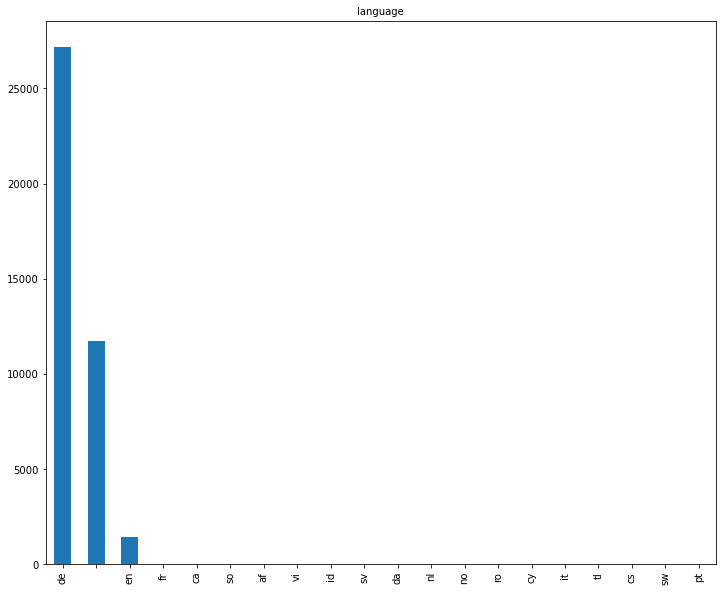

In [232]:
plot_data = df.language.apply(pd.Series).stack().str.strip().value_counts()[:20]
plot_data.plot.bar(figsize=(12,10), fontsize=10)
plt.title("language",fontsize=10)

In [92]:
df[df['language']!='de']

,id,title,company,location,contract_type,work_type,introduction,job_description,profile,date,clean_introduction,clean_job_description,clean_profile,clean_we_offer,clean_contacts,clean_title,language
9,7211025,Full Stack Architect (m/f/d),Noyes Technologies GmbH,München,Feste Anstellung,Vollzeit,"<p>We are Noyes Technologies, a Munich-based t...","<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,"We are Noyes Technologies, a Munich-based tec...",Responsibility for the design and conceptuali...,3+ years of professional experience in full s...,High personal responsibility &amp; room to ma...,We are looking forward to your application ma...,Full Stack Architect (m/f/d),en
18,7130533,Software Entwickler (m/w/d),Pico Engineering GmbH,Hannover,Feste Anstellung,Vollzeit,<p><strong>pico engineering GmbH</strong></p>,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,pico engineering GmbH,Eigenverantwortliche Führung von IT-Projekten...,Erfolgreich abgeschlossenes Studium der Infor...,Wir bieten eine herausfordernde Tätigkeit mit...,Bitte bewerben Sie sich unter: pico engineeri...,Software Entwickler,en
19,7130522,Software Test Manager / Testkoordinator (m/w/d...,Pico Engineering GmbH,"Berlin, Hannover oder Home Office",Feste Anstellung,"Vollzeit, Home Office",<p><strong>pico engineering GmbH</strong></p>,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,pico engineering GmbH,Erstellung und Weiterentwicklung von Testkonz...,Erfolgreich abgeschlossene Berufsausbildung (...,Wir bieten eine herausfordernde Tätigkeit mit...,Bitte bewerben Sie sich bei: pico engineering...,Software Test Manager / Testkoordinator in Ber...,en
36,7131796,Influencer Relations Manager (m/w/d),ghd Deutschland GmbH,Stuttgart,Feste Anstellung,Vollzeit,"<p>ghd Deutschland GmbH, based in Stuttgart, G...","<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,"ghd Deutschland GmbH, based in Stuttgart, Ger...",INFLUENCER MARKETING Owning the Influencer Ma...,Bachelor's degree or higher in Communications...,.,You can expect a comprehensive induction as w...,Influencer Relations Manager,en
74,7178354,Studienkoordinator / Studienassistenz für Medi...,CardioVasculäres Centrum Frankfurt,Frankfurt,Feste Anstellung,"Vollzeit, Teilzeit",<p></p>,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,,Das Aufgabengebiet umfasst die Organisation u...,Abgeschlossene Ausbildung oder Studium im med...,Ein interessantes und abwechslungsreiches Auf...,Dann senden Sie Ihre Bewerbungsunterlagen per...,Studienkoordinator / Studienassistenz für Medi...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40621,7121685,Senior Accountant (m/w/d) HGB,EQS Group AG,München,Feste Anstellung,Vollzeit,<p>EQS Group is a leading international provid...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-05-29,EQS Group is a leading international provider...,"Erstellung von Monats-, Quartals- und Jahresa...",Erfolgreich abgeschlossenes betriebswirtschaf...,You count! Ein vertrauensvolles Umfeld für De...,Wir freuen uns auf Deine Bewerbung und darauf...,Senior Accountant HGB,en
40623,7234005,Praktikant (m/w/d) Category Management Support...,REWE Group,Köln,Praktikum,Vollzeit,,,,2021-05-29,,,,Praktikant Category Management Support | Akti...,,Praktikant Category Management Support | Aktio...,
40624,7234234,Empfangsmitarbeiter (m/w/d),Hotel Ascari GmbH Ascari Parkhotel,Pulheim,,,<p></p>,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-05-29,,abgeschlossene Hotelfachausbildung erfahrener...,Check in/ out von Gästen Eigenständige Kassen...,Übertarif

In [ ]:
#df['language_clean_title'] = df["clean_title"].apply(lambda x: detect(x) if 
#                                 x.strip() != "" else "")
#df.head()

In [ ]:
#plot_data_title = df.language_clean_title.apply(pd.Series).stack().str.strip().value_counts()[:20]
#plot_data_title.plot.bar(figsize=(12,10), fontsize=10)
#plt.title("language_clean_title",fontsize=20)

By discovering the languages that are used in column “clean_job_description” has come an error: "No features in text". Because of the data’s amount the most convenient way to deal with this problem is to detect the rows that causes an error.

In [233]:
df["clean_job_description"].head(5)

0     Botengänge fahrten und Erledigung von Einkäuf...
1     Wir suchen einen erfahrenen Triebfahrzeugführ...
2     Sie betreuen engagiert unsere nationalen und ...
3     Helpdesk Benutzerunterstützung Administration...
4     Professionelle ganzheitliche und individuelle...
Name: clean_job_description, dtype: object

In [12]:
for row in df["clean_job_description"]:
    try:
        language = detect(row) if row.strip() != "" else ""
    except:
        language = "error"
        print("This row throws and error:", row, len(row))
    #row.append(language)
    #all.append(row)

In [13]:
df[df["clean_job_description"] == ' . ']

,id,title,company,location,contract_type,work_type,introduction,job_description,profile,date,clean_introduction,clean_job_description,clean_profile,clean_we_offer,clean_contacts,clean_title,language


As we can see there is onle one row with an error. It was made a decision to drop it. 

In [15]:
df = df.drop([20958])

KeyError: '[20958] not found in axis'

In [14]:
df['language_job_description'] = df["clean_job_description"].apply(lambda x: detect(x) if x.strip() != "" else "")
df.head()

,id,title,company,location,contract_type,work_type,introduction,job_description,profile,date,clean_introduction,clean_job_description,clean_profile,clean_we_offer,clean_contacts,clean_title,language_job_description
0,7216535,Haushaltshilfe / Housekeeping (m/w/d) für Conc...,ACG Alster Concierge GmbH,Hamburg,Feste Anstellung,Teilzeit,<p>Der moderne Alltag ist ein komplexes Zusamm...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Der moderne Alltag ist ein komplexes Zusammen...,Botengänge fahrten und Erledigung von Einkäuf...,Sehr gute Deutschkenntnisse sowie gute Englis...,Sozialversicherungspflichtiges Angestelltenve...,Für Rückfragen steht Ihnen die Geschäftsführe...,Haushaltshilfe Housekeeping für Concierge Serv...,de
1,7216528,Teamleiter (m/w/d) für unsere Triebfahrzeugfüh...,"Railtrans International, a.s",bundesweit,Feste Anstellung,Vollzeit,<p><strong>Teamleiter (m/w/d) für unsere Trieb...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Teamleiter für unsere Triebfahrzeugführer im ...,Wir suchen einen erfahrenen Triebfahrzeugführ...,Der ideale Bewerber verfügt über erfolgreich ...,überdurchschnittliches Gehalt attraktive Nach...,Weitere Details erfahren Sie gerne im persönl...,Teamleiter für unsere Triebfahrzeugführer im G...,de
2,7209677,Sales / Pre-Sales Spezialist (m/w/d) für Studi...,TELTEC AG,München,Feste Anstellung,Vollzeit,<p>Die <strong>Teltec AG</strong> ist seit meh...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Die Teltec AG ist seit mehr als 25 Jahren der...,Sie betreuen engagiert unsere nationalen und ...,Abgeschlossene Ausbildung zum Mediengestalter...,Ein kollegiales motiviertes dynamisches und h...,Wir freuen uns auf Ihre Bewerbung vorzugsweis...,Sales Pre Sales Spezialist für Studio und Prod...,de
3,7034977,IT-Fachkraft / IT-Spezialist als IT-Administra...,Boyens Medienholding GmbH & Co. KG,Heide,Feste Anstellung,Vollzeit,<p><strong>Arbeiten in einem modernen Medienun...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Arbeiten in einem modernen Medienunternehmen ...,Helpdesk Benutzerunterstützung Administration...,Abgeschlossene Ausbildung oder Studium im IT ...,Interessantes vielseitiges und zukunftssicher...,Ihre Bewerbung mit aussagekräftigen Unterlage...,IT Fachkraft IT Spezialist als IT Administrator,de
4,7238797,Pflegekraft in der Pflegeeinrichtung auf Pellw...,DRK Kreisverband Nordfriesland e.V.,Husum,Feste Anstellung,"Vollzeit, Teilzeit",<p>Der DRK-Kreisverband Nordfriesland e.V. in ...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...",2021-06-05,Der DRK Kreisverband Nordfriesland e V in Hus...,Professionelle ganzheitliche und individuelle...,Sie haben eine dreijährige Ausbildung im Bere...,ein freundliches Betriebsklima mit einem moti...,Haben Sie Interesse Dann freuen wir uns über ...,Pflegekraft in der Pflegeeinrichtung auf Pellw...,de


Text(0.5, 1.0, 'language_job')

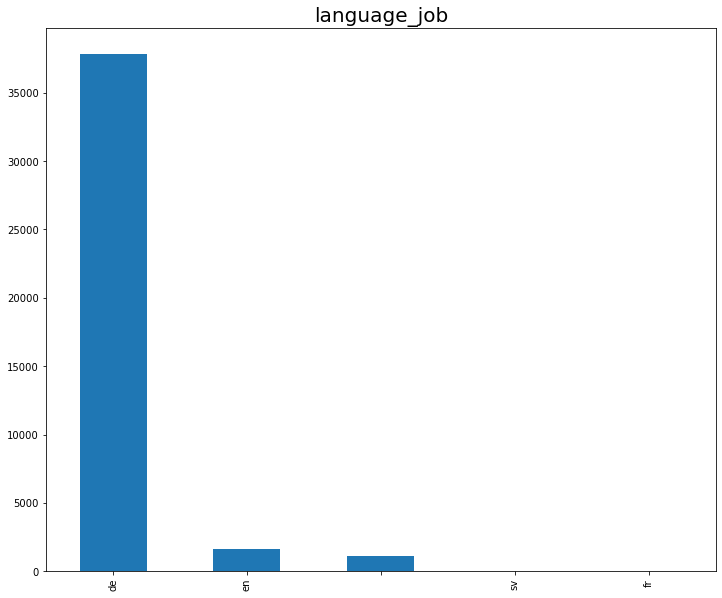

In [237]:
plot_data_job = df.language_job_description.apply(pd.Series).stack().str.strip().value_counts()[:20]
plot_data_job.plot.bar(figsize=(12,10), fontsize=10)
plt.title("language_job",fontsize=20)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40633 entries, 0 to 40633
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        40633 non-null  object
 1   title                     40633 non-null  object
 2   company                   40633 non-null  object
 3   location                  40633 non-null  object
 4   contract_type             40633 non-null  object
 5   work_type                 40633 non-null  object
 6   introduction              40633 non-null  object
 7   job_description           40633 non-null  object
 8   profile                   40633 non-null  object
 9   date                      40633 non-null  object
 10  clean_introduction        40633 non-null  object
 11  clean_job_description     40633 non-null  object
 12  clean_profile             40633 non-null  object
 13  clean_we_offer            40633 non-null  object
 14  clean_contacts        

In [15]:
df = df[df["language_job_description"] == "de"]
df.shape

(37859, 17)

In [19]:
df['language_job_description'].value_counts()

de    37860
Name: language_job_description, dtype: int64

## Length analysis

In [144]:
df['word_count'] = df["clean_job_description"].apply(lambda x: len(str(x).split(" ")))

C:\Users\bb1\miniconda3\envs\deep\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count'>

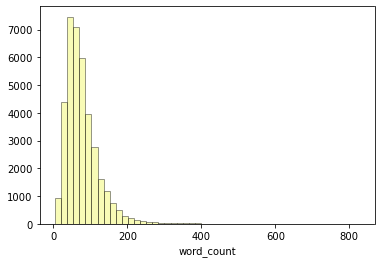

In [145]:
sns.distplot(df['word_count'], hist=True, kde=False, color = '#eff549',
             hist_kws={'edgecolor':'black'})

Text(0, 0.5, 'density')

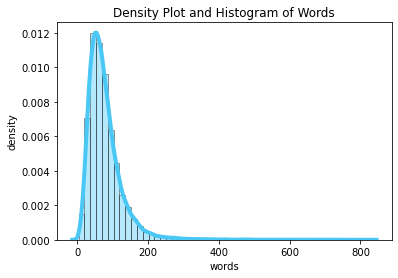

In [146]:
sns.distplot(df['word_count'], hist=True, kde=True, 
             color = '#49c7f5', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot and Histogram of Words') 
plt.xlabel('words'); plt.ylabel('density')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37860 entries, 0 to 40633
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        37860 non-null  object
 1   title                     37860 non-null  object
 2   company                   37860 non-null  object
 3   location                  37860 non-null  object
 4   contract_type             37860 non-null  object
 5   work_type                 37860 non-null  object
 6   introduction              37860 non-null  object
 7   job_description           37860 non-null  object
 8   profile                   37860 non-null  object
 9   date                      37860 non-null  object
 10  clean_introduction        37860 non-null  object
 11  clean_job_description     37860 non-null  object
 12  clean_profile             37860 non-null  object
 13  clean_we_offer            37860 non-null  object
 14  clean_contacts        

# Tokanization & Lemmatization


In [67]:
from HanTa import HanoverTagger as ht
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stopwords_de = stopwords.words('german')
stopwords_en = stopwords.words('english')
stopwords_de_extra = ['Schwerpunkt', 'Bereich', 'Mitarbeiter', 'Sachbearbeiter', 'Professional']
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tesle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I use englisch and german stopwords because there are a lot of job titles in eglish. These job titles consist of englisch words that are empty in the context meaning.

In [73]:
def lemma_text(text):
    new_text_array = []
    #new_text = ''
    sentences = sent_tokenize(text,language='german')
    for sent in sentences:
        tokens = word_tokenize(sent,language='german')
        lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(tokens)]
        words = [w for w in lemma if not w in stopwords_de]
        words_de = [w for w in lemma if not w in stopwords_de_extra]
        engl = [e for e in lemma if not e in stopwords_en]
        words = [word for word in words if word.isalpha()]
        #new_text += ' '.join(words) + ' ' #for ngramms we don't need this line of code
        new_text_array.extend(words)
        #return new_text.strip()
    return new_text_array

In [21]:
lemma_text('Die Maus ist tot. Immer noch.')

['Maus', 'tot', 'immer']

In [23]:
word_tokenize('Die Maus ist tot. Immer noch.')

['Die', 'Maus', 'ist', 'tot', '.', 'Immer', 'noch', '.']

In [74]:
df['lemm_title'] = df['clean_title'].apply(lemma_text)

KeyboardInterrupt: 

In [ ]:
#df['lemm_introduction'] = df['clean_introduction'].apply(lemma_text)
#df['lemm_job_description'] = df['clean_job_description'].apply(lemma_text)
#df['lemm_profile'] = df['clean_profile'].apply(lemma_text)
#df['lemm_we_offer'] = df['clean_we_offer'].apply(lemma_text)
#df['lemm_contacts'] = df['clean_contacts'].apply(lemma_text)
#df['lemm_title'] = df['clean_title'].apply(lemma_text)

In [243]:
df['lemm_title'].head()

0    Haushaltshilfe Housekeeping Concierge Service ...
1      Teamleiter Triebfahrzeugführer Güterfernverkehr
2    Sales Pre Sales Spezialist Studio Produktionst...
3          it Fachkraft it Spezialist it administrator
4               Pflegekraft Pflegeeinrichtung Pellworm
Name: lemm_title, dtype: object

# Word Frequency 

In [71]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
texts = list(map(lambda t: ' '.join(t), df['lemm_title'])) #merging word lists (lemmas)
word_freq = pd.Series(" ".join(texts).split()).value_counts()
#word_freq[1:40].rename("Word frequency of most common words").hvplot.bar(
    #rot=45
#).opts(width=700, height=400, yformatter=NumeralTickFormatter(format="0,0"))
word_freq[1:10]

Mitarbeiter       2312
Senior            2136
it                2123
Bereich           1705
Sales             1135
Sachbearbeiter    1067
technisch          998
Schwerpunkt        987
Management         955
dtype: int64

In [63]:
df[df['clean_title'].str.contains(' f ')].clean_title[1:10]

1389    Product Specialist m f d Regional Project Mana...
1702                Product Manager Clinical Systems m f 
1757    Mobile App Developer for Vibratory Hearing Sys...
1848    Product Specialist CV m f d Sales Clinic Area ...
1870    Product Specialist Oncology m f d Sales Area 1...
1903    Product Specialist m f d Sales CV Area Gütersl...
2855                            Development Engineer m f 
2976                                    R D Engineer m f 
4107                 Junior Sales Manager Automotive m f 
Name: clean_title, dtype: object

In [27]:
df['title'][27254]

'Intern Management Consulting m/f/t'

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

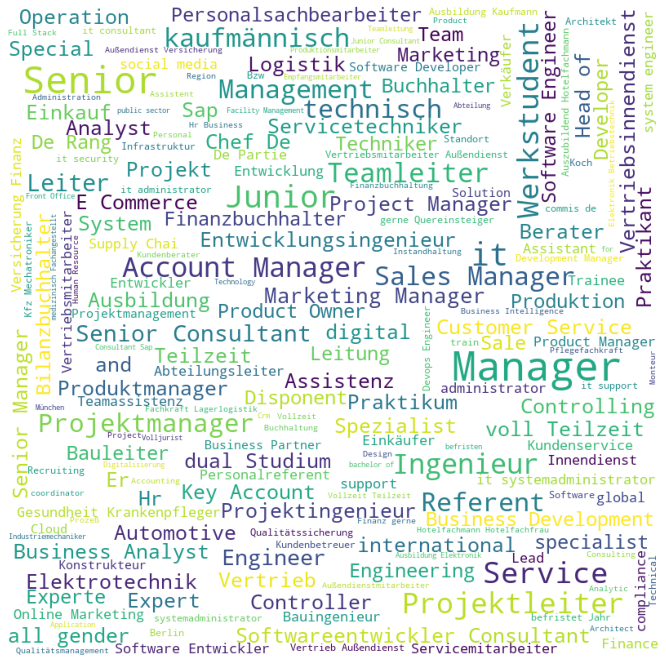

In [72]:
text = " ".join(texts)
wordcloud = WordCloud(
    width = 800,
    height = 800,
    stopwords = ['Schwerpunkt', 'Bereich', 'Mitarbeiter', 'Sachbearbeiter'], 
    background_color = "white", 
    max_font_size = 50
).generate(text)
plt.figure(figsize = (16,12))#plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
text_x = [text]

In [44]:
vectorizer = TfidfVectorizer(
    analyzer="word", ngram_range=(3, 4), norm="l2"
)
vectorizer.fit(text_x)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(3, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [64]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer.vocabulary_).sample(40, random_state=1)
print(f" word (ngram) vector extract:\n\n{word_vector}")

 word (ngram) vector extract:

bereich professional service schwerpunkt                              30961
cloud microsoft werk                                                  43403
kfz schadenbearbeitung manager                                       122497
dual studium sicherheitswesen                                         62341
mitarbeiter vertriebsinnendienst internal                            159209
entwicklung prozeß integrationsanlage                                 74209
ng produktionshelfer recycling                                       164371
facharbeiterin straße tiefbau                                         79212
restaurantleiter restaurant waterkant                                199996
projektleiter bauherrenvertreter knoten                              185912
future offshore project assessment                                    89327
mitarbeiter kasse information                                        157130
molekular tumorboard mtb assistent                       

# Varaibles Transformatioin

In [ ]:
df['contract_type'].head()

In [ ]:
df["contract_type"].value_counts()
#.plot.hist()
#plt.title("contract_type", fontsize=15)
#plt.show()

In [ ]:
df["location"].value_counts()[:10] #[:60]

In [ ]:
#need = df['location'][re.search(('\,|\/', )]
#df['location'].('\,|\/')
#df['Jobrol'] = np.where(df['Jobrol'].isin(need), df['Jobrol'], 'Multiple')

multiple_loc = df["location"].apply(lambda x: re.search('\,|\/', x) == None)
df['location'] = np.where(multiple_loc, df['location'], 'Multiple')


In [ ]:
df["location"].value_counts()[:10] #[:60]

In [ ]:
df['work_type'].value_counts()

# NER

In [ ]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings
from flair.embeddings import WordEmbeddings, FlairEmbeddings
from flair.embeddings import StackedEmbeddings

In [ ]:
# init forward embedding
flair_embedding_forward = FlairEmbeddings('de-forward')
flair_embedding_backward = FlairEmbeddings('de-backward')

In [ ]:
stacked_embeddings = StackedEmbeddings([
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])

In [ ]:
sentence = Sentence('The grass is green .')

In [ ]:
def flair_emb(text):
    embeddings = []
    sentences = sent_tokenize(text,language='german')
    for sent in sentences:
        sentence = Sentence(sent)
        stacked_embeddings.embed(sentence)
        for token in sentence:
            print(token)
            print(token.embedding)
        embeddings.push(token.embedding)
    return embeddings

In [ ]:
df['clean_title'].apply(lemma_text)

In [ ]:
# https://medium.com/thecyphy/training-custom-ner-model-using-flair-df1f9ea9c762